## Lab 3

ER190 | Fall 2018

Duncan Callaway
<br>GSI: Seigi Karasaki

Your name:
<br>Collaborators:

-------------------------------------------

Welcome to your third lab of the semester! 

<u>Lab objectives:</u>
1. Understand different file types: csv, tsv, json
2. Exercise basic merge operations
3. Exercise basic pivoting and grouping
4. Practice .loc and .iloc
5. Perform basic plotting, e.g.,

```
df.plot(x='...', y=['...', '...'], kind='bar')
plt.ylabel("...")
plt.title("...")
```

Also, get comfortable with:
4. .count method
6. rename
7. .apply

In [1]:
import pandas as pd
import os

## Question 1.1: 
What sort of files are `dogs1.txt`, `dogs2.txt` and `dogs3.txt`?

** Inspect the files in a text editor, or find a command to view them in line without loading. **

In [3]:
"""
with open("log.txt") as fileobject:
    for line in fileobject:
        do_something_with(line)
"""

# switching out the txt files (dogs2, dogs3) works fine

with open("dogs1.txt") as infile:
    for line in infile:
        print(line)

name,breed,color1,color2,color3,size,lifespan (y)

Oink,border collie mix,black,brown,white,medium,16.0

Darcy,border collie,black ,brown,white,medium,15.0

Kia,border collie,black,brown,white,small,17.0

Corey,hound mix,brown,black,,medium,16.0

Maisy,terrier mix,tan,white,,small,

Mojeau,shepherd mix,brown,tan,,large,14.0

Eli,husky mix,black,brown,white,large,13.0



## Question 1.2
Describe the difference between these file types.

In [5]:
"""
From Wiki:
Formats that use delimiter-separated values (also DSV) store two-dimensional arrays of data by separating 
the values in each row with specific delimiter characters. Most database and spreadsheet programs are able 
to read or save data in a delimited format. Due to their wide support, DSV files can be used in data 
exchange among many applications.

A delimited text file is a text file used to store data, in which each line represents a single book, 
company, or other thing, and each line has fields separated by the delimiter. Compared to the kind of 
flat file that uses spaces to force every field to the same width, a delimited file has the advantage of 
allowing field values of any length.
"""

"""
CSV: separated by a comma (,)
TSV: separated by a tabulation (<TAB> or \t)

Are there any differences in practical application? Main consideration is that problems arise if the 
delimiter (comma, etc) appear within the fields. Another would be readability. At our level, we don't 
really need to worry about speed.

https://stackoverflow.com/questions/11130120/choosing-between-tsv-and-csv

JSON (JavaScript Object Notation: organized very similarly to python dictionaries
- better at showing hierarchical/relational data.
- better for working with large datasets and files.

example:

var dat_json = {
    name : "Seigi",
    dept : "ERG",
    year : 4
}

https://codingnetworker.com/2015/10/python-dictionaries-json-crash-course/
"""

## Question 1.3
Load each 'dogs*.txt' file in to a data frame and display them.

(Note: * is a wildcard character, i.e. a placeholder that can be interpreted as multiple things)

In [4]:
"""
Remember - always informative to pull up documentation (shift-tab). 
Note that sep defaults to ','
"""

dog1 = pd.read_csv('dogs1.txt')
dog1

,name,breed,color1,color2,color3,size,lifespan (y)
0,Oink,border collie mix,black,brown,white,medium,16.0
1,Darcy,border collie,black,brown,white,medium,15.0
2,Kia,border collie,black,brown,white,small,17.0
3,Corey,hound mix,brown,black,NaN,medium,16.0
4,Maisy,terrier mix,tan,white,NaN,small,NaN
5,Mojeau,shepherd mix,brown,tan,NaN,large,14.0
6,Eli,husky mix,black,brown,white,large,13.0


In [5]:
dog2 = pd.read_csv('dogs2.txt', sep = '\t')
dog2

,name,breed,color1,color2,color3,size,lifespan (y)
0,Oink,border collie mix,black,brown,white,medium,16.0
1,Darcy,border collie,black,brown,white,medium,15.0
2,Kia,border collie,black,brown,white,small,17.0
3,Corey,hound mix,brown,black,NaN,medium,16.0
4,Maisy,terrier mix,tan,white,NaN,small,NaN
5,Mojeau,shepherd mix,brown,tan,NaN,large,14.0
6,Eli,husky mix,black,brown,white,large,13.0


In [7]:
dog3 = pd.read_json('dogs3.txt')
dog3

# this is more like it! 

,name,breed,color1,color2,color3,size,lifespan (y)
0,Oink,border collie mix,black,brown,white,medium,16.0
1,Darcy,border collie,black,brown,white,medium,15.0
2,Kia,border collie,black,brown,white,small,17.0
3,Corey,hound mix,brown,black,None,medium,16.0
4,Maisy,terrier mix,tan,white,None,small,NaN
5,Mojeau,shepherd mix,brown,tan,None,large,14.0
6,Eli,husky mix,black,brown,white,large,13.0


## Question 1.4
Take a close look at the dataframe. Do you notice anything unusual? What's a possible explanation?

There's a NaN in the lifespan column. Maisy is still alive! 

## Question 1.5
Load dogweight.csv into a dataframe, and take a look at it.

In [16]:
dogwt = pd.read_csv('dog_weight.csv')
dogwt

,Unnamed: 0,weight (kg)
0,Oink,20
1,Darcy,23
2,Kia,15
3,Cori,25
4,Maisy,9
5,Mojeau,30
6,Eli,35


## Question 2.1
Merge dogwt (dogweight.csv) with one of the dog files from above.

In [17]:
# merging dogwt and dog1 drops Corey (typo)
pd.merge(dogwt,dog1,left_on='Unnamed: 0', right_on='name')

,Unnamed: 0,weight (kg),name,breed,color1,color2,color3,size,lifespan (y)
0,Oink,20,Oink,border collie mix,black,brown,white,medium,16.0
1,Darcy,23,Darcy,border collie,black,brown,white,medium,15.0
2,Kia,15,Kia,border collie,black,brown,white,small,17.0
3,Maisy,9,Maisy,terrier mix,tan,white,NaN,small,NaN
4,Mojeau,30,Mojeau,shepherd mix,brown,tan,NaN,large,14.0
5,Eli,35,Eli,husky mix,black,brown,white,large,13.0


In [18]:
dogwt.loc[3,'Unnamed: 0'] = 'Corey'

In [19]:
dog_merged = pd.merge(dogwt,dog1,left_on='Unnamed: 0', right_on='name')
dog_merged

,Unnamed: 0,weight (kg),name,breed,color1,color2,color3,size,lifespan (y)
0,Oink,20,Oink,border collie mix,black,brown,white,medium,16.0
1,Darcy,23,Darcy,border collie,black,brown,white,medium,15.0
2,Kia,15,Kia,border collie,black,brown,white,small,17.0
3,Corey,25,Corey,hound mix,brown,black,NaN,medium,16.0
4,Maisy,9,Maisy,terrier mix,tan,white,NaN,small,NaN
5,Mojeau,30,Mojeau,shepherd mix,brown,tan,NaN,large,14.0
6,Eli,35,Eli,husky mix,black,brown,white,large,13.0


## Question 2.2 
Drop one of the unneeded columns from the dataframe.

In [20]:
dog_merged.drop(['Unnamed: 0'], inplace = True, axis = 1)
dog_merged

,weight (kg),name,breed,color1,color2,color3,size,lifespan (y)
0,20,Oink,border collie mix,black,brown,white,medium,16.0
1,23,Darcy,border collie,black,brown,white,medium,15.0
2,15,Kia,border collie,black,brown,white,small,17.0
3,25,Corey,hound mix,brown,black,NaN,medium,16.0
4,9,Maisy,terrier mix,tan,white,NaN,small,NaN
5,30,Mojeau,shepherd mix,brown,tan,NaN,large,14.0
6,35,Eli,husky mix,black,brown,white,large,13.0


## 3 Groupby

## Question 3.1 
Group the merged data frame into groups of 'size' with the variables 'weight (kg)' and 'lifespan (y)'.

In [21]:
dog_group = dog_merged[['weight (kg)', 'lifespan (y)']].groupby(dog_merged['size'])

## Question 3.2
Count how many entries are in each group.  Is groupby counting NaNs?

In [22]:
dog_group.count()

,weight (kg),lifespan (y)
size,,
large,2,2
medium,3,3
small,2,1


`groupby` is not counting NaNs (look at the third row)

## Question 3.3
Find the average weight and lifespan for each group.

In [23]:
dog_group.mean()

,weight (kg),lifespan (y)
size,,
large,32.500000,13.500000
medium,22.666667,15.666667
small,12.000000,17.000000


## Question 4.1
Now, lets do some basic plotting:

- scatter plot of lifespan versus weight
- commands for x- and y-axis labels
- command for title

In [24]:
import matplotlib.pyplot as plt

Text(0.5,1,'Relationship between dog life and weight')

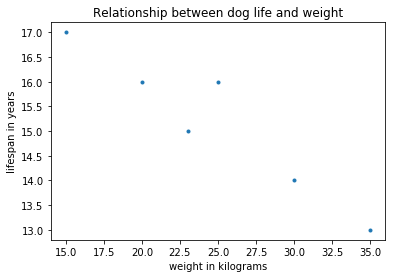

In [25]:
plt.plot(dog_merged['weight (kg)'], dog_merged['lifespan (y)'], '.')
plt.xlabel('weight in kilograms')
plt.ylabel('lifespan in years')
plt.title('Relationship between dog life and weight')

## Question 5.1
While many of us are probably familiar with the metric system, we're probably not 100% confident on how to convert this mysterious "kilogram" unit to pounds (multiply by two, ish?). Lets try our hand at a conversion.

Start by defining a function which converts kilograms to pounds.

In [27]:
import numpy as np
def kg2lb(x):
    return x*2.2

## Question 5.2
Now use the `.apply` method to apply our `.sum` function along the weight column of the merged dog data frame to compute dog weights in pounds:

In [29]:
dog_merged['weight (kg)'].apply(kg2lb)

0    44.0
1    50.6
2    33.0
3    55.0
4    19.8
5    66.0
6    77.0
Name: weight (kg), dtype: float64

# Hooray, you're done! 

Please remember to submit your lab work, after running all cells, in .html and .ipynb format on bCourses.